<h1>NB model on kaggle-pet competition</h1>

<h1>DATA LOADING

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.listdir('../../data')
assert 'out_breed.csv' in os.listdir('../../data') # this assert breaks if the data is configured uncorrectly

In [10]:
breeds = pd.read_csv('../../data/out_breed.csv')
colors = pd.read_csv('../../data/out_color.csv')
states = pd.read_csv('../../data/out_state.csv')
train  = pd.read_csv('../../data/out_train.csv')
test   = pd.read_csv('../../data/out_test.csv')
sub    = pd.read_csv('../../data/out_submission.csv')

<h1>MODEL</h1>

In [4]:
from gaussianNaiveBayes import PredictiveModel as gaussianPredictiveModel
from multinomialNaiveBayes import PredictiveModel as multinomialPredictiveModel

<h1>EXAMPLE USAGE</h1>

In [5]:
string_cols = ["Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description", "PhotoAmt","VideoAmt","PetID"]
categorical_col = ["Type","Gender","Vaccinated","Dewormed","Sterilized","Breed1","Breed2","Color1","Color2","Color3","State"]
numerical_col = [col for col in train.columns if col not in string_cols and col not in categorical_col and col != "AdoptionSpeed"]

numerical_X = train[numerical_col]
numerical_X_test = train[numerical_col]

X = train.drop(["AdoptionSpeed", "Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description", "PhotoAmt","VideoAmt","PetID"], axis=1)
X_test = test.drop(["Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description", "PhotoAmt","VideoAmt","PetID"], axis=1)

"""
Y is our target value, Adoption Speed can be a value [1,2,3,4]
"""
Y = train['AdoptionSpeed']

assert X.shape[0] == Y.shape[0]

In [6]:
model = gaussianPredictiveModel("gNB")
model.train(numerical_X, Y, verbose=True)
predictions = model.predict(numerical_X_test)
assert len(predictions)

Mon Mar 11 08:41:57 2019 [gNB.__init__] initialized succesfully
Mon Mar 11 08:41:57 2019 [gNB.train] start training
Mon Mar 11 08:41:57 2019 [gNB.train] WARNING: Index(['Age', 'MaturitySize', 'FurLength', 'Health', 'Quantity', 'Fee'], dtype='object') must be Gaussian
Mon Mar 11 08:41:57 2019 [gNB.train] trained succefully


<h1>VALIDATION

In [7]:
string_cols = ["Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description", "PhotoAmt","VideoAmt","PetID"]
categorical_col = ["Type","Gender","Vaccinated","Dewormed","Sterilized","Breed1","Breed2","Color1","Color2","Color3","State"]
numerical_col = [col for col in train.columns if col not in string_cols and col not in categorical_col and col != "AdoptionSpeed"]

numerical_X = train[numerical_col]
numerical_X_test = train[numerical_col]

X = train.drop(["AdoptionSpeed", "Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description", "PhotoAmt","VideoAmt","PetID"], axis=1)
X_test = test.drop(["Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description", "PhotoAmt","VideoAmt","PetID"], axis=1)

"""
Y is our target value, Adoption Speed can be a value [1,2,3,4]
"""
Y = train['AdoptionSpeed']

assert X.shape[0] == Y.shape[0]

<h2>gaussianPredictiveModel validation

In [8]:
model = gaussianPredictiveModel("gNB_validation_model")

Mon Mar 11 08:42:05 2019 [gNB_validation_model.__init__] initialized succesfully


In [9]:
model.validation(numerical_X, Y, method=1)

0.049338037187933906

In [11]:
model.validation(numerical_X, Y, method=2)

0.051837035594567246

In [15]:
numerical_X.drop(['MaturitySize','FurLength'],axis=1,inplace=True)

/Users/alex/Desktop/Coding/AI/kaggle-pets/venv/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [18]:
numerical_scaled = pd.DataFrame(StandardScaler().fit_transform(numerical_X))

/Users/alex/Desktop/Coding/AI/kaggle-pets/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/alex/Desktop/Coding/AI/kaggle-pets/venv/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


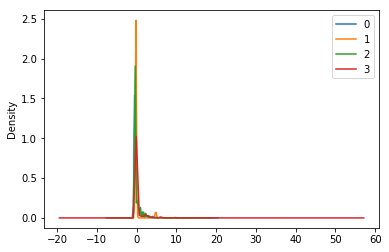

In [22]:
numerical_scaled.plot.kde(ind=100)

In [20]:
model.validation(numerical_scaled, Y, method=2)

0.028759027525781654

<h2>multinomialPredictiveModel validation

In [12]:
model = multinomialPredictiveModel("mNB_validation_model")

Wed Mar  6 04:25:11 2019 [mNB_validation_model.__init__] initialized succesfully


In [11]:
categorical_X=X['Breed1']
mapping_size=len(breeds)

In [13]:
model.validation(categorical_X, Y, mapping_size, method=1)

0.06521202798183798

In [14]:
model.validation(categorical_X, Y, mapping_size, method=2)

0.06471905800918545

<h1>Categorical Features Validation using NB

In [23]:
features_importance = {} 

In [25]:
feature, feature_size = "Breed1", len(breeds)
print(feature, feature_size)
model = multinomialPredictiveModel("mNB_validation_model")
score = model.validation(X[feature], Y, feature_size, method=1)
features_importance[feature] = score
print(feature, score)

Breed1 307
Mon Mar 11 11:04:27 2019 [mNB_validation_model.__init__] initialized succesfully
Breed1 0.06521202798183798


In [26]:
feature, feature_size = "Breed2", len(breeds)
print(feature, feature_size)
model = multinomialPredictiveModel("mNB_validation_model")
score = model.validation(X[feature], Y, feature_size, method=1)
features_importance[feature] = score
print(feature, score)

Breed2 307
Mon Mar 11 11:04:39 2019 [mNB_validation_model.__init__] initialized succesfully
Breed2 0.016322994465050054


In [27]:
feature, feature_size = "Color1", len(colors)
print(feature, feature_size)
model = multinomialPredictiveModel("mNB_validation_model")
score = model.validation(X[feature], Y, feature_size, method=1)
features_importance[feature] = score
print(feature, score)

Color1 7
Mon Mar 11 11:04:42 2019 [mNB_validation_model.__init__] initialized succesfully
Color1 0.012134527811713447


In [28]:
feature, feature_size = "Color2", len(colors)
print(feature, feature_size)
score = model.validation(X[feature], Y, feature_size, method=1)
features_importance[feature] = score
print(feature, score)

Color2 7
Color2 0.002906781966766081


In [29]:
feature, feature_size = "Color3", len(colors)
print(feature, feature_size)
score = model.validation(X[feature], Y, feature_size, method=1)
features_importance[feature] = score
print(feature, score)

Color3 7
Color3 0.002696587684870533


states values need to be remapped [x, y, z] -> [1,2,3]

In [35]:
states_reset_map = {value: key for key, value in dict(states['StateID']).items()}
X["State_reset"] = X["State"].map(states_reset_map)
X["State_reset"].head()

0    13
1     3
2    13
3     3
4    13
Name: State_reset, dtype: int64

In [36]:
feature, feature_size = "State_reset", len(states)
print(feature, feature_size)
score = model.validation(X[feature], Y, feature_size, method=1)
features_importance[feature] = score
print(feature, score)

State_reset 15
State_reset 0.028705371025809435


In [33]:
feature, feature_size = "Type", 2
score = model.validation(X[feature], Y, feature_size, method=1)
features_importance[feature] = score
print(feature, score)

Type 0.017738962688735094


In [33]:
features_importance

{'Breed1': 0.06521202798183798,
 'Breed2': 0.016322994465050054,
 'Color1': 0.012134527811713447,
 'Color2': 0.002906781966766081,
 'Color3': 0.002696587684870533,
 'State_reset': 0.028705371025809435,
 'Type': 0.017738962688735094}

Text(0.5, 1.0, 'Categorical Features Importance based on Naive Bayes validation')

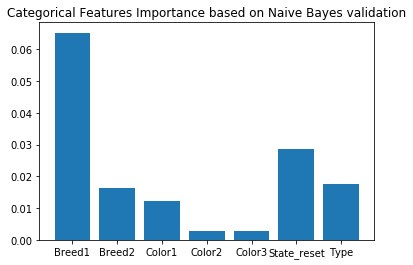

In [38]:
from matplotlib import pyplot as plt
plt.bar(features_importance.keys(),features_importance.values())
plt.title('Categorical Features Importance based on Naive Bayes validation')